# **UNDERSTANDING K-NEAREST NEIGHTBORS (K-NN)**
> * What is KNN
> * The math behind

> * Pros and Cons


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## **1. Loading Data**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

## **2. Data Exploration**

In [65]:
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df_iris['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

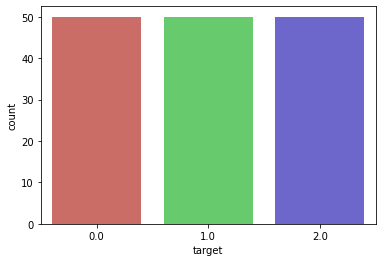

In [ ]:
sb.countplot(x = 'target', data= df_iris, palette='hls')

In [ ]:
df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


### **2.1 Look for outliers**

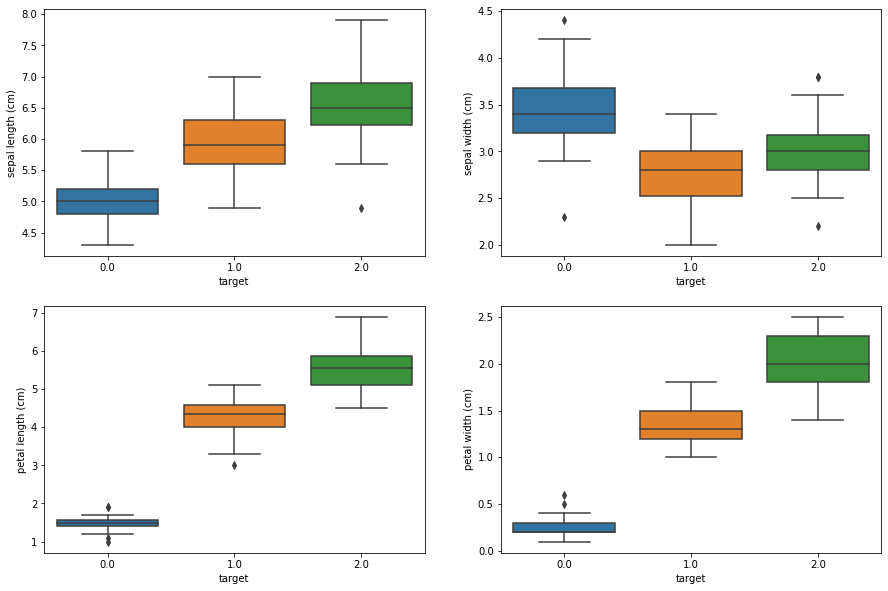

In [66]:

plt.figure(figsize=(15,10))

i = 0
for feature in iris.feature_names:
  i = i+1
  plt.subplot(2,2,i)
  sb.boxplot(x ='target', y =feature, data = df_iris)

plt.show()

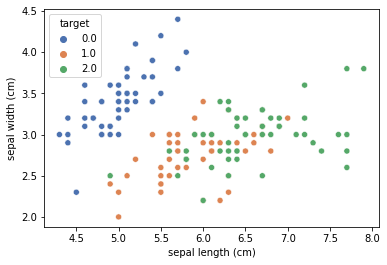

In [142]:
sb.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=df_iris, hue='target', palette="deep")

## **3. The Model**

In [72]:
X = df_iris[iris.feature_names].values
y = df_iris['target'].values

In [74]:
le = LabelEncoder()
y = le.fit_transform(y)

In [75]:
# Split into training and data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [134]:
# We make an instance of the model and initialize k = 2
classifier = KNeighborsClassifier(n_neighbors= 2)
# Fitting the model
classifier.fit(X_train, y_train)
# Predicting the test result
y_pred = classifier.predict(X_test)

In [140]:
print("It was used as distance metric: {}".format(classifier.effective_metric_))

It was used as distance metric: euclidean


### **3.1 Evaluate & Predict**

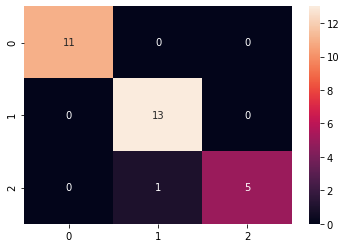

In [135]:
cm = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot = True)

In [136]:
accuracy = metrics.accuracy_score(y_test, y_pred)*100
error = metrics.mean_squared_error(y_test, y_pred)*100
print("Evaluation of the model: {}% accuracy and {}% error".format( round(accuracy, 2), round(error, 4) ))

Evaluation of the model: 96.67% accuracy and 3.3333% error


### **3.1 Get a better K value**

In [146]:
k_list = list(range(1,50,2))
k_scores = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X_train, y_train, cv=10, scoring = 'accuracy')
  k_scores.append(scores.mean())


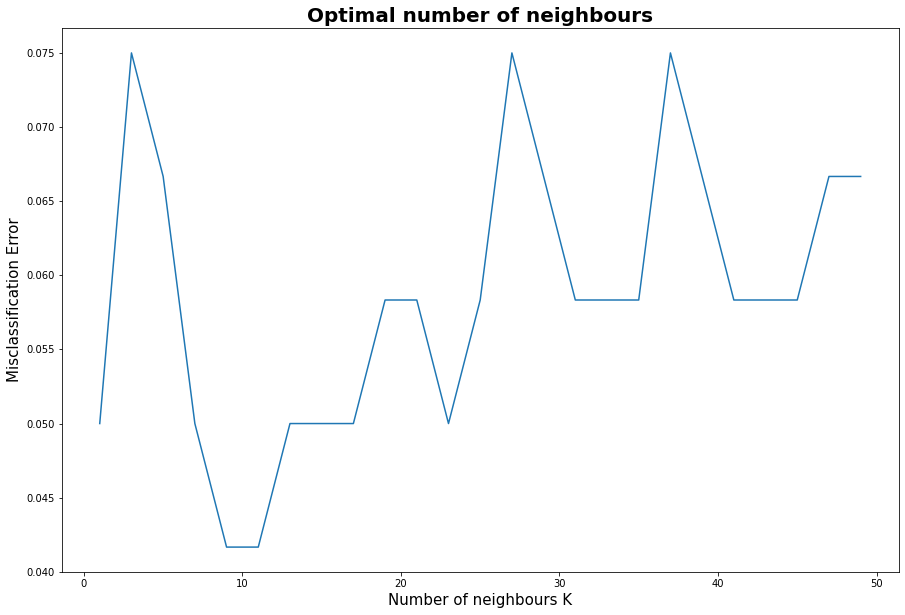

In [149]:
MSE = [1-x for x in k_scores]

plt.figure(figsize=(15,10))
plt.title("Optimal number of neighbours", fontsize = 20, fontweight = 'bold')
plt.xlabel('Number of neighbours K', fontsize = 15)
plt.ylabel('Misclassification Error', fontsize = 15)
plt.plot(k_list, MSE)

plt.show()

In [151]:
print("The minimum value in the MSE plor is: {}".format(min(MSE)))
best_k_value = k_list[MSE.index(min(MSE))]
print("So the best value for K is: {}".format(best_k_value))


The minimum value in the MSE plor is: 0.04166666666666674
So the best value for K is: 9


### **3.1.1 Test the new K value**

Evaluation of the model: 100.0% accuracy and 0.0% error


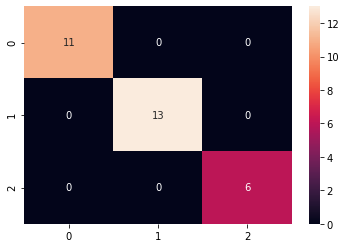

In [152]:
# Training again the classifier with the new value
classifier = KNeighborsClassifier(n_neighbors= best_k_value)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Confussion Matrix to evaluate the model
cm = metrics.confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot = True)
# Mesure the accuracy and the corresponding error
accuracy = metrics.accuracy_score(y_test, y_pred)*100
error = metrics.mean_squared_error(y_test, y_pred)*100
print("Evaluation of the model: {}% accuracy and {}% error".format( round(accuracy, 2), round(error, 4) ))

In [164]:
# Get the classes name
classes = {}
for i in range(len(iris.target_names)):
  classes[i] = iris.target_names[i]

print(classes)

# Make the prediction 
prediction = classifier.predict(X_test)
print(classes[prediction[0]])

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}
virginica


*RESOURCES:*
* [Basis of KNN](https://pub.towardsai.net/k-nearest-neighbors-knn-algorithm-tutorial-machine-learning-basics-ml-ec6756d3e0ac)
* [EDA in Iris dataset](https://medium.com/analytics-vidhya/exploratory-data-analysis-uni-variate-analysis-of-iris-data-set-690c87a5cd40)
